In [3]:
# numpy, scipy, pandasのインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3
# ランダムシードの固定
np.random.seed(0)

In [4]:
# サイコロの出目を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])
# 対象データdice_dataから1つランダムに抽出する（試行）
print('ランダムに1つ抽出:', np.random.choice(dice_data, 1))

ランダムに1つ抽出: [5]


In [5]:
# サイコロを1000回振ってみる
calc_steps = 1000
# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls= np.random.choice(dice_data, calc_steps)
# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


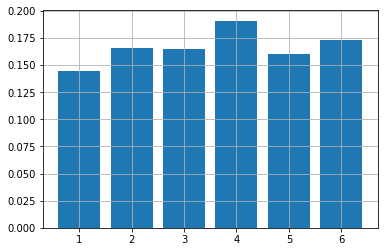

In [7]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps= 1000
# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls= np.random.choice(dice_data, calc_steps)
# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data= np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data= np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [8]:
# ベルヌーイ分布
# 0:head(表)、1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])
#uniqueで一意な値を抽出（ここの場合は、0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data= np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


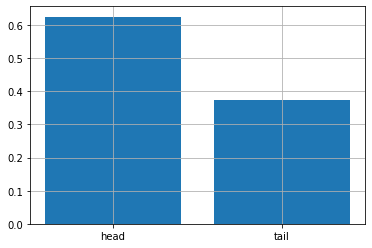

In [9]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

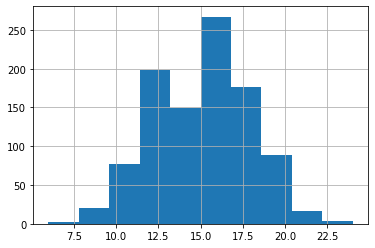

In [10]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

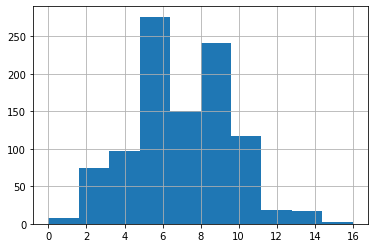

In [11]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

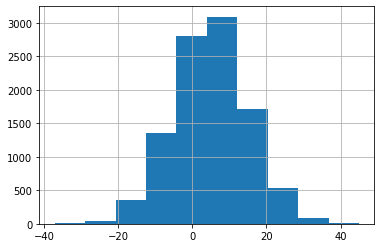

In [13]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

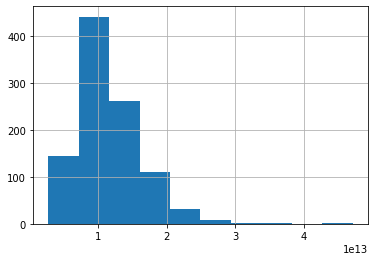

In [14]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

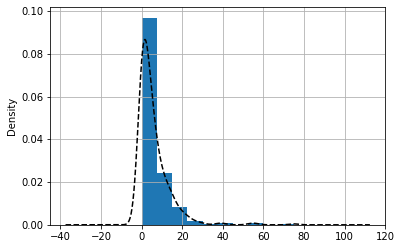

In [15]:
# データを読み込む
student_data_math= pd.read_csv('student-mat.csv', sep=';')
# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')
# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

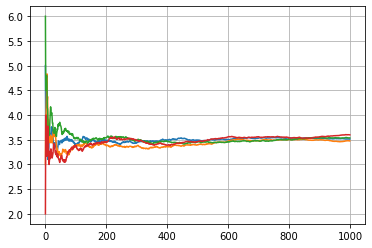

In [16]:
# 大数の法則
# 計算回数
calc_times =1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)
# 4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [18]:
# 中心極限定理
def function_central_theory(N):
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    mean_array = np.array([])
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
    
    plt.hist(mean_array)
    plt.grid(True)

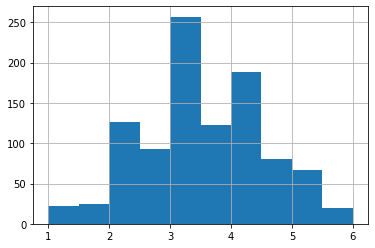

In [20]:
# N =3 
function_central_theory(3)

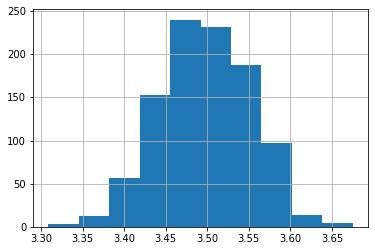

In [21]:
# N = 10^3
function_central_theory(10**3)

In [22]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')
# ポルトガルのデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')
# マージする
student_data_merge = pd.merge(student_data_math
                                                    , student_data_por
                                                    , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                                                    , suffixes=('_math', '_por'))
print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())


G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


In [23]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p値= ', p)


p値=  1.653655521710079e-16
